**Risk Analysis Chatbot**


In [ ]:
# Import Libraries

import pandas as pd
import numpy as np

In [ ]:
# Import Dataset

dataset = pd.read_csv(r'https://raw.githubusercontent.com/siiddd/Risk-Analysis-Chatbot/main/dataset.csv')

In [ ]:
dataset.shape

(425, 11)

In [ ]:
dataset.head(5)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,1/1/2016 0:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,1/2/2016 0:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,1/6/2016 0:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,1/8/2016 0:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,1/10/2016 0:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


Lets us remove the First Column which has the index.

We can 'Label Encode' the Columns: 

1. Countries 
2. Local 
3. Industry Sector 
4. Accident Level 
5. Potential Level 
6. Gender 
7. Employee or Third Party

In [ ]:
dataset = dataset.iloc[:, 1:]
dataset

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,1/1/2016 0:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1/2/2016 0:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,1/6/2016 0:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,1/8/2016 0:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,1/10/2016 0:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...
420,7/4/2017 0:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,7/4/2017 0:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,7/5/2017 0:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,7/6/2017 0:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

dataset['Countries'] = label_encoder.fit_transform(dataset['Countries'])
dataset['Local'] = label_encoder.fit_transform(dataset['Local'])
dataset['Industry Sector'] = label_encoder.fit_transform(dataset['Industry Sector'])
dataset['Accident Level'] = label_encoder.fit_transform(dataset['Accident Level'])
dataset['Potential Accident Level'] = label_encoder.fit_transform(dataset['Potential Accident Level']) 
dataset['Genre'] = label_encoder.fit_transform(dataset['Genre'])
dataset['Employee or Third Party'] = label_encoder.fit_transform(dataset['Employee or Third Party'])
dataset['Critical Risk'] = label_encoder.fit_transform(dataset['Critical Risk'])
dataset

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,1/1/2016 0:00,0,0,1,0,3,1,1,20,While removing the drill rod of the Jumbo 08 f...
1,1/2/2016 0:00,1,1,1,0,3,1,0,21,During the activation of a sodium sulphide pum...
2,1/6/2016 0:00,0,2,1,0,2,1,2,15,In the sub-station MILPO located at level +170...
3,1/8/2016 0:00,0,3,1,0,0,1,1,16,Being 9:45 am. approximately in the Nv. 1880 C...
4,1/10/2016 0:00,0,3,1,3,3,1,1,16,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...
420,7/4/2017 0:00,0,3,1,0,2,1,1,16,"Being approximately 5:00 a.m. approximately, w..."
421,7/4/2017 0:00,0,2,1,0,1,0,0,16,The collaborator moved from the infrastructure...
422,7/5/2017 0:00,1,8,0,0,1,1,0,31,During the environmental monitoring activity i...
423,7/6/2017 0:00,1,4,0,0,1,1,0,6,The Employee performed the activity of strippi...


In [ ]:
dataset['Countries'].value_counts(sort = True)

0    251
1    130
2     44
Name: Countries, dtype: int64

In [ ]:
dataset['Local'].value_counts()

2     90
4     59
0     57
3     56
5     46
9     44
7     27
1     24
6     14
11     4
8      2
10     2
Name: Local, dtype: int64

In [ ]:
dataset['Industry Sector'].value_counts(sort = True)

1    241
0    134
2     50
Name: Industry Sector, dtype: int64

In [ ]:
dataset['Accident Level'].value_counts(sort = True)

0    316
1     40
2     31
3     30
4      8
Name: Accident Level, dtype: int64

In [ ]:
dataset['Potential Accident Level'].value_counts(sort = True)

3    143
2    106
1     95
0     49
4     31
5      1
Name: Potential Accident Level, dtype: int64

In [ ]:
dataset['Genre'].value_counts(sort = True)

1    403
0     22
Name: Genre, dtype: int64

In [ ]:
dataset['Employee or Third Party'].value_counts(sort = True)

1    189
0    179
2     57
Name: Employee or Third Party, dtype: int64

In [ ]:
# Check for Missing Values

dataset.isna().sum()

Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [ ]:
# Removing the Date Column

dataset = dataset.iloc[:, 1:]

In [ ]:
# Rename Genre to Gender

dataset.rename(columns = {'Genre' : 'Gender'}, inplace = True)
dataset

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,0,0,1,0,3,1,1,20,While removing the drill rod of the Jumbo 08 f...
1,1,1,1,0,3,1,0,21,During the activation of a sodium sulphide pum...
2,0,2,1,0,2,1,2,15,In the sub-station MILPO located at level +170...
3,0,3,1,0,0,1,1,16,Being 9:45 am. approximately in the Nv. 1880 C...
4,0,3,1,3,3,1,1,16,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...
420,0,3,1,0,2,1,1,16,"Being approximately 5:00 a.m. approximately, w..."
421,0,2,1,0,1,0,0,16,The collaborator moved from the infrastructure...
422,1,8,0,0,1,1,0,31,During the environmental monitoring activity i...
423,1,4,0,0,1,1,0,6,The Employee performed the activity of strippi...


In [ ]:
# Creating a Feature out of 'Accident Level' and 'Potential Accident Level' by combining them

dataset['Custom Accident Level'] = dataset['Accident Level'] + dataset['Potential Accident Level']
dataset = dataset.iloc[:, [0,1,2,5,6,7,8,9]]
dataset

,Countries,Local,Industry Sector,Gender,Employee or Third Party,Critical Risk,Description,Custom Accident Level
0,0,0,1,1,1,20,While removing the drill rod of the Jumbo 08 f...,3
1,1,1,1,1,0,21,During the activation of a sodium sulphide pum...,3
2,0,2,1,1,2,15,In the sub-station MILPO located at level +170...,2
3,0,3,1,1,1,16,Being 9:45 am. approximately in the Nv. 1880 C...,0
4,0,3,1,1,1,16,Approximately at 11:45 a.m. in circumstances t...,6
...,...,...,...,...,...,...,...,...
420,0,3,1,1,1,16,"Being approximately 5:00 a.m. approximately, w...",2
421,0,2,1,0,0,16,The collaborator moved from the infrastructure...,1
422,1,8,0,1,0,31,During the environmental monitoring activity i...,1
423,1,4,0,1,0,6,The Employee performed the activity of strippi...,1


In [ ]:
# Target Variable is 'Custom Accident Level'

dataset_y = dataset['Custom Accident Level']
dataset_y.value_counts(sort = True)

2    96
3    94
1    88
0    49
5    29
4    29
6    23
7     9
8     7
9     1
Name: Custom Accident Level, dtype: int64

In [ ]:
# Independant Variables separation

dataset_x = dataset.iloc[:, :-1]
dataset_x

,Countries,Local,Industry Sector,Gender,Employee or Third Party,Critical Risk,Description
0,0,0,1,1,1,20,While removing the drill rod of the Jumbo 08 f...
1,1,1,1,1,0,21,During the activation of a sodium sulphide pum...
2,0,2,1,1,2,15,In the sub-station MILPO located at level +170...
3,0,3,1,1,1,16,Being 9:45 am. approximately in the Nv. 1880 C...
4,0,3,1,1,1,16,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...
420,0,3,1,1,1,16,"Being approximately 5:00 a.m. approximately, w..."
421,0,2,1,0,0,16,The collaborator moved from the infrastructure...
422,1,8,0,1,0,31,During the environmental monitoring activity i...
423,1,4,0,1,0,6,The Employee performed the activity of strippi...


In [ ]:
# Split the data into Test and Train

from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(dataset_x, pd.DataFrame(dataset_y), train_size = 0.90, random_state = 12)
print(x_train.shape, y_train.shape)

(382, 7) (382, 1)


In [ ]:
x_train.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)
x_test.reset_index(inplace = True, drop = True)
y_test.reset_index(inplace = True, drop = True)

**Pre-process the 'Description' feature from the 'Train' dataset**

In [ ]:
description = x_train['Description']
description

0      During the execution of the area cleaning acti...
1      Being 9:40 a.m. The driver of the AEQ-819 plat...
2      During the activity of chuteo of ore in hopper...
3      At 04:00 h on 05/19/17, the mechanic on duty o...
4      When removing the cap from the wear plate of t...
                             ...                        
377    As the employee cleaned the thermal recovery b...
378    The workers: César (injured) and Nilton receiv...
379    The maid was handling a pipette for sample pre...
380    The operator of the Scissor 187 leaves his equ...
381    the moment of extracting the bolts of the CHUC...
Name: Description, Length: 382, dtype: object

In [ ]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
import re

for i in range(len(description)):
   description[description.index[i]] = re.sub('[^a-zA-Z]',' ', description[description.index[i]]).lower()
   description[description.index[i]] = re.sub('\s+', ' ', description[description.index[i]])
   description[description.index[i]] = nltk.word_tokenize(description[description.index[i]])
   description[description.index[i]] = [WordNetLemmatizer().lemmatize(word) for word in description[description.index[i]] if word not in stopwords.words('english')]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Se

In [ ]:
!pip install nlpaug
!pip install transformers

import nlpaug.augmenter.word as naw

     |████████████████████████████████| 410 kB 4.1 MB/s 
     |████████████████████████████████| 3.5 MB 3.9 MB/s 
     |████████████████████████████████| 67 kB 4.1 MB/s 
     |████████████████████████████████| 596 kB 49.3 MB/s 
     |████████████████████████████████| 6.8 MB 30.4 MB/s 
     |████████████████████████████████| 895 kB 54.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


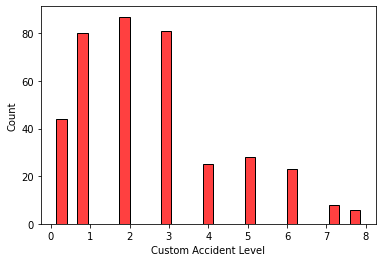

In [ ]:
import seaborn as sns

sns.histplot(y_train['Custom Accident Level'], shrink  = 0.5, color = 'red')

**From the above plot it is obvious that there is a 'Heavy Imbalance' in the dataset**

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

for i in range(len(description)):
   description[description.index[i]] = [TreebankWordDetokenizer().detokenize(description[description.index[i]])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
description

0      [execution area cleaning activity using hoe em...
1      [driver aeq plate dump truck ton heading loadi...
2      [activity chuteo ore hopper op operator locomo...
3      [h mechanic duty section antonio observed acti...
4      [removing cap wear plate warman lx bb pump lef...
                             ...                        
377    [employee cleaned thermal recovery boiler usin...
378    [worker c sar injured nilton receive order imm...
379    [maid handling pipette sample preparation chem...
380    [operator scissor leaf equipment parked level ...
381    [moment extracting bolt chuck rotation unit vs...
Name: Description, Length: 382, dtype: object

In [ ]:
description = list(description)
description

[['execution area cleaning activity using hoe employee hit fixed metal structure area coming reach abdomen left'],
 ['driver aeq plate dump truck ton heading loading area nv ob tj bp parking proceeding ore loading scoop ydrs moment lift first scoop towards hopper large bank fall causing tipper shake violently operator hit gear lever communicate supervisor evacuated medical center'],
 ['activity chuteo ore hopper op operator locomotive park equipment hopper fill first car moment blowing release load mud flow suddenly appears presence rock fragment personnel direction flow covered mud'],
 ['h mechanic duty section antonio observed activity withdrawal check pom moment impacted pulp line discharge stuck causing irritation right part neck ear mechanic referred medical center evaluation'],
 ['removing cap wear plate warman lx bb pump left hand employee glove slipped came contact cutting part board'],
 ['removing drill rod jumbo maintenance supervisor proceeds loosen support intermediate cent

In [ ]:
import math
aug = naw.ContextualWordEmbsAug()

temp = y_train.groupby(['Custom Accident Level'])

for j in y_train['Custom Accident Level'].value_counts(sort = True).index.values:
  for x in temp.get_group(j).index.values:
    a = 100
    b = y_train['Custom Accident Level'].value_counts(sort = True)[j]
    c = a-b
    d = a%b
    e = a/b

    if b > c:
      for z in range(c):
        description.append(aug.augment(description[x], n = 1))
        y_train = y_train.append({'Custom Accident Level' : j}, ignore_index = True)

    elif c > b:
      for z in range(b):
        description.append(aug.augment(description[x], n = math.floor(e)))
        y_train = y_train.append({'Custom Accident Level' : j}, ignore_index = True)
      
    elif c == b:
      for z in range(b):
        description.append(aug.augment(description[x], n = 1))
        y_train = y_train.append({'Custom Accident Level' : j}, ignore_index = True)

**Let us save the Augmented and Balanced Dataset for future use**

In [ ]:
description_augmented = pd.DataFrame(description, columns = ['Description'])
description_augmented.to_csv('description_augmented.csv')

In [ ]:
dataset_chatbot = pd.concat([description_augmented, y_train], axis = 1)
dataset_chatbot.to_csv('dataset_chatbot.csv')
dataset_chatbot.head(5)

,Description,Custom Accident Level
0,execution area cleaning activity using hoe emp...,2
1,driver aeq plate dump truck ton heading loadin...,6
2,activity chuteo ore hopper op operator locomot...,3
3,h mechanic duty section antonio observed activ...,1
4,removing cap wear plate warman lx bb pump left...,1


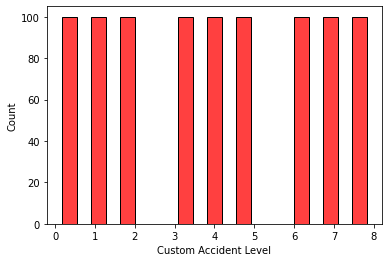

In [ ]:
import seaborn as sns

sns.histplot(dataset_chatbot['Custom Accident Level'], shrink  = 0.5, color = 'red')

**Making a Balanced Dataset to feed into Machine Learning Models**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 12)

x_train_ml, y_train_ml = smote.fit_resample(x_train.iloc[:, :-1], y_train)

In [ ]:
print(x_train_ml.shape, y_train_ml.shape)

(783, 6) (783, 1)


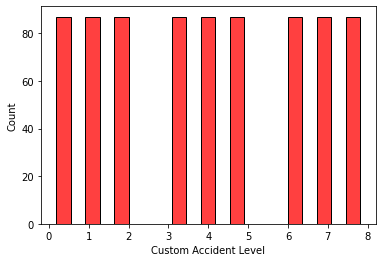

In [ ]:
import seaborn as sns

sns.histplot(y_train_ml['Custom Accident Level'], shrink  = 0.5, color = 'red')

**x_train_ml** and **y_train_ml** can be used in **Machine Learning Models**

**dataset_chatbot** can be used in **RNN/LSTM Classifier** 

**dataset_chatbot** has its **Stop Words Removed**, **Lemmatized**

**Contextual Word Embedding Augmentation (ContextualWordEmbsAug)** is used in **dataset_chatbot** for handling **Imbalanced Dataset** 

In [ ]:
dataset_chatbot

,Description,Custom Accident Level
0,execution area cleaning activity using hoe emp...,2
1,driver aeq plate dump truck ton heading loadin...,6
2,activity chuteo ore hopper op operator locomot...,3
3,h mechanic duty section antonio observed activ...,1
4,removing cap wear plate warman lx bb pump left...,1
...,...,...
895,approximately from circumstance of launched of...,8
896,access level installation wall grade lining pi...,8
897,access bridge installation activity hydraulic ...,8
898,one level structure activity station service p...,8


We will create another dataset without removing stop words, lemmatization.
We will use the following Augmentation Techniques:

1. Contextual Word Embedding Augmentation (ContextualWordEmbsAug)
2. Synonym Augmentation (SynonymAug)
3. TFIDF Augmentation (TfidfAug)
4. Word Embeding Augmentation (WordEmbsAug)

We drop all columns except the **Description** and the **Target Variable (Accident Level)**

In [100]:
# Import Libraries

import pandas as pd
import numpy as np
import math
import seaborn as sns

In [101]:
# Import Dataset

dataset = pd.read_csv(r'https://raw.githubusercontent.com/siiddd/Risk-Analysis-Chatbot/main/dataset.csv')

In [102]:
dataset_final = dataset.iloc[:, [5, -1]]
dataset_final.head(5)

,Accident Level,Description
0,I,While removing the drill rod of the Jumbo 08 f...
1,I,During the activation of a sodium sulphide pum...
2,I,In the sub-station MILPO located at level +170...
3,I,Being 9:45 am. approximately in the Nv. 1880 C...
4,IV,Approximately at 11:45 a.m. in circumstances t...


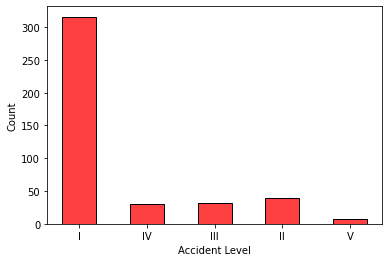

In [53]:
import seaborn as sns
sns.histplot(x = dataset_final['Accident Level'], color = 'red', shrink = 0.50)

In [103]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

dataset_final['Accident Level'] = label_encoder.fit_transform(dataset_final['Accident Level'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [104]:
# Split the data into Test and Train

from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(pd.DataFrame(dataset_final['Description'], columns = ['Description']), pd.DataFrame(dataset_final['Accident Level'], columns = ['Accident Level']), train_size = 0.90, random_state = 12)

In [105]:
x_train.reset_index(inplace = True, drop = True)
x_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)
y_test.reset_index(inplace = True, drop = True)

In [106]:
y_train['Accident Level'].value_counts()

0    283
1     33
2     31
3     29
4      6
Name: Accident Level, dtype: int64

Let us combine **Accident Level 4 and 5** as a single class

In [107]:
y_train.replace(4, 3, inplace = True)

In [108]:
y_train['Accident Level'].value_counts()

0    283
3     35
1     33
2     31
Name: Accident Level, dtype: int64

Let us Balance the dataset!

In [66]:
!pip install nlpaug 
!pip install transformers

import nltk
import nlpaug.augmenter.word as naw
import nlpaug.flow as naf

nltk.download('popular')
from nltk.corpus import stopwords

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [109]:
Description = list(x_train['Description'])

In [110]:
import re

for i in range(len(Description)):
  Description[i] = Description[i].lower()
  Description[i] = re.sub('[^a-z]', ' ', Description[i])
  Description[i] = Description[i].split()
  Description[i] = ' '.join(Description[i])

In [111]:
Description

['during the execution of the area cleaning activity using a hoe the employee hit against a fixed metal structure in the area coming to reach the abdomen on the left',
 'being a m the driver of the aeq plate dump truck ton was heading to the loading area nv ob tj bp parking and proceeding with the ore loading with the scoop ydrs at that moment lift the first scoop towards the hopper and a large bank falls causing the tipper to shake violently and the operator to be hit with the gear lever communicate with the supervisor and evacuated to the medical center',
 'during the activity of chuteo of ore in hopper op the operator of the locomotive parks his equipment under the hopper to fill the first car it is at this moment that when it was blowing out to release the load a mud flow suddenly appears with the presence of rock fragments the personnel that was in the direction of the flow was covered with mud',
 'at h on the mechanic on duty of section antonio is observed in the activity of with

In [112]:
print(len(Description), type(Description))

382 <class 'list'>


In [82]:
aug  = naf.Sometimes([naw.ContextualWordEmbsAug(action  = 'substitute', aug_min = 1, aug_max = 2, stopwords = stopwords.words('english')),
                      naw.ContextualWordEmbsAug(action  = 'insert', aug_min = 1, aug_max = 2, stopwords = stopwords.words('english')),
                      naw.SynonymAug(aug_min = 1, aug_max = 2, stopwords = stopwords.words('english')), 
                      naw.RandomWordAug(action = 'substitute', aug_min = 1, aug_max = 2, stopwords = stopwords.words('english')), 
                      naw.RandomWordAug(action = 'swap', aug_min = 1, aug_max = 2, stopwords = stopwords.words('english')), 
                      naw.RandomWordAug(action = 'delete', aug_min = 1, aug_max = 2, stopwords = stopwords.words('english'))])

In [125]:
temp = y_train.groupby(['Accident Level'])

for j in y_train['Accident Level'].value_counts(sort = True).index.values:
  for x in temp.get_group(j).index.values:
    a = 300
    b = y_train['Accident Level'].value_counts(sort = True)[j]
    c = a-b
    d = a%b
    e = a/b

    if b > c:
      for z in range(c):
        print(Description[z])
        Description.append(aug.augment(Description[z], n = 1))
        print(Description[-1])
        y_train = y_train.append({'Accident Level' : j}, ignore_index = True)

    elif c > b:
      for z in range(b):
        print(Description[z])
        Description.append(aug.augment(Description[z], n = math.floor(e)))
        print(Description[-1])
        y_train = y_train.append({'Accident Level' : j}, ignore_index = True)
      
    elif c == b:
      for z in range(b):
        Description.append(aug.augment(Description[z], n = 1))
        y_train = y_train.append({'Accident Level' : j}, ignore_index = True)

during the execution of the area cleaning activity using a hoe the employee hit against a fixed metal structure in the area coming to reach the abdomen on the left
['during the passing of the outdoor area cleansing using activity a hoe the hit against a fixed metal _ in water the coming to reach the abdomen on the top _', 'during the of the drill for activity using a hoe the employee hit against a long fixed metal in the _ coming to _ reach the abdomen on the left', 'during the execution of the cleaning area by workers in a hoe the employee hit against a fixed metal in the area coming to large the abdomen on the left', 'during the execution of the _ cleansing activity using a the first employee hit against a _ in structure the area open coming to reach the abdomen on the left', 'during the _ of the area a activity _ a hoe the employee hit against a broken metal structure in the coming occasionally to reach abdomen the on the left', 'during the execution of the cleaning area to _ expend

KeyboardInterrupt: ignored

In [127]:
for z in range(10):
  print(z)

0
1
2
3
4
5
6
7
8
9


In [123]:
temp = y_train.groupby('Accident Level', 'Description')
temp.get_group(1)

ValueError: ignored

In [89]:
len(Description)

959

In [90]:
description_augmented = pd.DataFrame(Description, columns = ['Description'])
description_augmented.to_csv('description_test.csv')

In [91]:
dataset_chatbot = pd.concat([description_augmented, y_train], axis = 1)
dataset_chatbot.to_csv('description_test.csv')
dataset_chatbot.head(5)

,Description,Accident Level
0,during the execution of the area cleaning acti...,1
1,being a m the driver of the aeq plate dump tru...,3
2,during the activity of chuteo of ore in hopper...,0
3,at h on the mechanic on duty of section antoni...,0
4,when removing the cap from the wear plate of t...,0
